In [28]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import optimize

In [29]:
def fx(xvn, yvn):
    return 5*xvn + 3*yvn

def fy(xvn, yvn):
    return -3*xvn - yvn

def fx2(xvn, yvn, a, b ,c):
    return 5*xvn + 3*yvn

def fy2(xvn, yvn,a, b ,c):
    return -3*xvn - yvn

$$\frac{(y_{n+1} - y_n)}{T} = f(x_n, y_{n+1})$$

$$
$$


In [30]:
# TODO: remove list, можно использовать предыдущее значение
def newtonsMethod(T, x, y):
    prev_x = x  # list of x(y) values
    for _ in range(100):
        xn = prev_x  # previous value of x
        y_x = ((-3*xn)*T+y)/(1+T)  # y выраженный через х

        f = -xn+(5*xn + 3*y_x)*T+x
        g = -1+T*(5) - 9*T*T/(1+T)
        
        prev_x = prev_x - f/g
        # print(x)
    return prev_x

In [31]:
"""Неявный метод Эйлера 1-го порядка"""
def implicit_method(T, xvn, yvn):
    xn2 = newtonsMethod(T, xvn, yvn)
    yn2 = (T*-3*xn2 + yvn)/(1+T)
    return (xn2, yn2)

[scipy root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html),
[Jacobian](<https://math.libretexts.org/Bookshelves/Calculus/Supplemental_Modules_(Calculus)/Vector_Calculus/3%3A_Multiple_Integrals/3.8%3A_Jacobians>)


In [32]:
"""Неявный метод Хаммера-Холлингсворта 4-го порядка"""
def implicit2_method(T, xvn, yvn):
     # Таблица Бутчера
     a = [[1/4, 1/4 - math.sqrt(3)/6],
          [1/4 + math.sqrt(3)/6, 1/4]]
     # c = [(1/2 - math.sqrt(3)/6), 1/2 + math.sqrt(3)/6]
     b = [1/2, 1/2]

     # 5x+3y
     # -3x-y
     # x[0] = kx1, x[1] = kx2
     def fk(vec):
          # kx1 = T * fx(t, xvn + a[0][0] * kx1 + a[0][1] * kx2, yvn + a[0][0] * ky1 + a[0][1] * ky2)
          # ky1 = T * fy(t, xvn + a[0][0] * kx1 + a[0][1] * kx2, yvn + a[0][0] * ky1 + a[0][1] * ky2)
          # kx2 = T * fx(t, xvn + a[1][0] * kx1 + a[1][1] * kx2, yvn + a[1][0] * ky1 + a[1][1] * ky2)
          # ky2 = T * fx(t, xvn + a[1][0] * kx1 + a[1][1] * kx2, yvn + a[1][0] * ky1 + a[1][1] * ky2)

          # vec = [kx1, kx2, ky1, ky2]
          xn = [xvn + T * (a[0][0] * vec[0] + a[0][1] * vec[1]), xvn + T * (a[1][0] * vec[0] + a[1][1] * vec[1])]
          yn = [yvn + T * (a[0][0] * vec[2] + a[0][1] * vec[3]), yvn + T * (a[1][0] * vec[2] + a[1][1] * vec[3])]
          
          # т.к. уравнения равны нулю, вычитаем k
          return [fx(xn[0], yn[0]) - vec[0],  # kx
                  fx(xn[1], yn[1]) - vec[1],
                  fy(xn[0], yn[0]) - vec[2],  # ky
                  fy(xn[1], yn[1]) - vec[3]]
     
     def jac_fk(vec):
          # Якобиан системы, частные производные от каждого
          # уравнения по каждой переменной

          # fx dx = 5
          # fx dy = 3
          # fy dx = -3
          # fy dy = -1
          # умножить на производные от xn, yn по vec[i]
          # vec = [kx1, kx2, ky1, ky2] в таком же порядке берем частные производные
          # в таком же порядке матрица вертикально

          return np.array([[5 * T * a[0][0] - 1, 5 * T * a[0][1], 3 * T * a[0][0], 3 * T * a[0][1]],
                          [5 * T * a[1][0], 5 * T * a[1][1] - 1, 3 * T * a[1][0], 3 * T * a[1][1]],
                          [-3 * T * a[0][0], -3 * T * a[0][1], -T * a[0][0] - 1, -T * a[0][1]],
                          [-3 * T * a[1][0], -3 * T * a[1][1], -T * a[1][0], -T * a[1][1] - 1]])


     sol = optimize.root(fun=fk, x0=[0, 0, 0, 0],
                         jac=jac_fk, method='hybr')
     xn = xvn + T * (b[0] * sol.x[0] + b[1] * sol.x[1])
     yn = yvn + T * (b[0] * sol.x[2] + b[1] * sol.x[3])

     return (xn, yn)

In [33]:
# новый шаг
def get_p(array):
    s = sum([i ** 2 for i in array])
    return math.sqrt(s)

# T0 - максимальный возможный шаг
def new_T(last_T, T0, array, array_prev, L):
    p = get_p(array)
    F = [i / p for i in array]
    p_prev = get_p(array_prev)
    F_prev = [i / p_prev for i in array_prev]
    X = [(F[i] - F_prev[i]) / last_T for i in range(len(F))]
    XX = sum([i ** 2 for i in X])
    new_T = T0 / (1 + math.sqrt(L) * XX ** (1/4))
    return new_T

In [34]:
# def implicit2_method(T, a, xvn3, yvn3, c, b):
#     yn3 = (2*(1-5/2*T)*yvn3-(3*xvn3+yvn3)*(T-5/2*T*T)-3/2*T*T*(5*xvn3 + 3*yvn3)-3*T*xvn3)/(2*(1-2*T+T*T))
#     xn3 = (1/2*(5*xvn3+3*yvn3+3*yn3)*T + xvn3)/(1-5/2*T)
#     return (xn3, yn3)

In [35]:
def do_method(method, t_start, t_finish, array, variables, dynamic_step: bool=True):
    T, a, b, c = [i for i in variables]
    max_step = T
    tl = [t_start]
    array_T = [T]
    array_dif = [(fx(array[-1][0], array[-1][1]),
                    fy(array[-1][0], array[-1][1]))]
    while tl[-1] <= t_finish:
        array.append(method(T, array[-1][0], array[-1][1]))
        array_dif.append((fx(array[-1][0], array[-1][1]),
                fy(array[-1][0], array[-1][1])))
        tl.append(tl[-1] + T)
    return (tl, array, array_dif)

c:\Users\coconut\PycharmProjects\projectPractice\src\drawing.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


StatisticsError: mean requires at least one data point

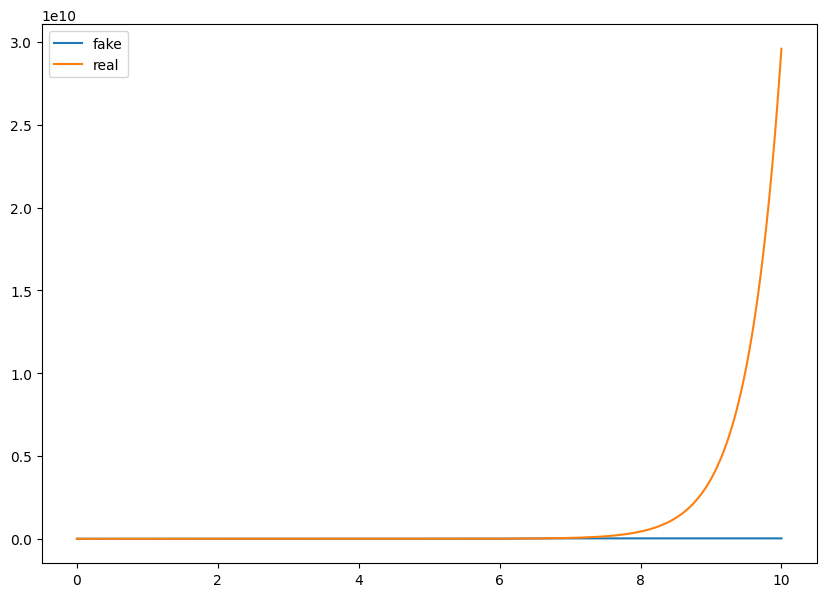

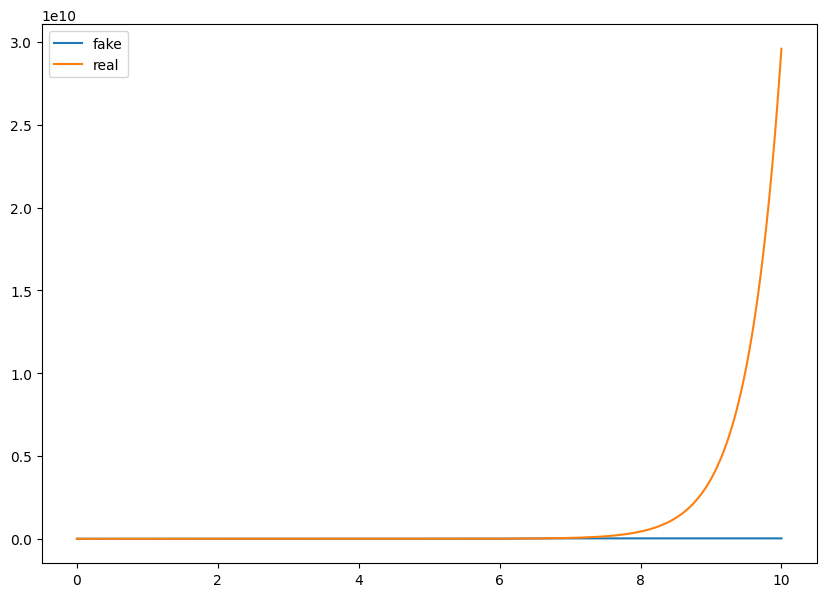

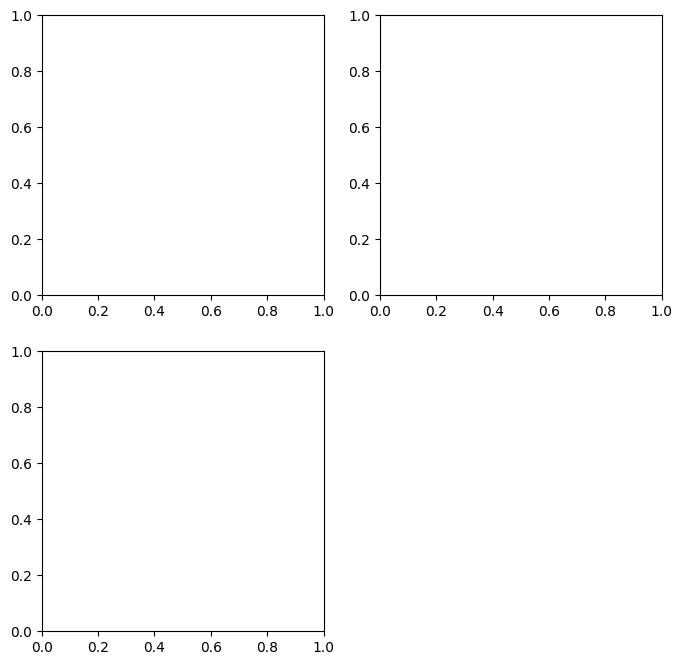

In [36]:
import math
from statistics import mean
import matplotlib.pyplot as plt
from typing import Callable

from num_methods import Solver2
from drawing import draw

def f(T_in):
    T = T_in
    C1 = 1
    C2 = 2
    # T = 0.001
    t_start = 0
    t_finish = 10
    a = 1
    c = 0.5
    b = 0.60
    # Первый элемент это x, второй y
    variables = (T, a, b, c)
    # array0 = [(2, 0)]
    
    lst =  ((C1+3*C2*t_start) * math.e**(2*t_start), (C2 - C1 - 3 * C2 * t_start) * math.e**(2*t_start))
    sol = Solver2((fx2, fy2), [a, b, c], lst, (t_start, t_finish))
    array1 = sol.do_method(sol.explicit1_method, T_in, False)

    # array1 = do_method(explicit_method, t_start, t_finish, [lst], variables, False)
    array2 = do_method(implicit2_method, t_start, t_finish, [lst], variables, False)
    array3 = sol.do_method(sol.explicit4_method, T_in, False)

    arrayx1 = [i[0] for i in array1[1]]
    arrayy1 = [i[1] for i in array1[1]]
    arrayx2 = [i[0] for i in array2[1]]
    arrayy2 = [i[1] for i in array2[1]]
    arrayx3 = [i[0] for i in array3[1]]
    arrayy3 = [i[1] for i in array3[1]]
    # arrayx4 = [i[0] for i in array3[1]]
    # arrayy4 = [i[1] for i in array3[1]]
    # print(len(array1[0]), len(array2[0]), len(array3[0]))
    max_dif = [0, 0, 0]
    tl = array2[0]
    for i in range(len(array1[0])):
        real_x = (C1+3*C2*tl[i]) * math.e**(2*tl[i])
        real_y = (C2 - C1 - 3 * C2 * tl[i]) * math.e**(2*tl[i])
        max_dif[0] = max(max_dif[0], abs(arrayx1[i] - real_x))
        max_dif[0] = max(max_dif[0], abs(arrayy1[i] - real_y))
        max_dif[1] = max(max_dif[1], abs(arrayx2[i] - real_x))
        max_dif[1] = max(max_dif[1], abs(arrayy2[i] - real_y))
        max_dif[2] = max(max_dif[2], abs(arrayx3[i] - real_x))
        max_dif[2] = max(max_dif[2], abs(arrayy3[i] - real_y))
    args = np.linspace(t_start, t_finish, 500)
    x_true = list([(C1+3*C2*t) * math.e**(2*t) for t in args])
    draw([array2[0], args], [arrayx2, x_true], ['fake', 'real'])
    # return 
    return max_dif
t_l = list()
diff_l1 = list()
diff_l2 = list()
diff_l3 = list()

t = 0.001
dif = f(t)
crd_move_y1 = math.log(dif[0])
crd_move_x = math.log(t)
crd_move_y2 = math.log(dif[1])
crd_move_y3 = math.log(dif[2])
T = 0.1
while t <= T:
    if abs(t - 0.2)<0.000001 or abs(t-0.5)<0.0000001:
        t += 0.001
        continue
    # print(t, end=" ")
    dif = f(t)
    # break
    # print(t, dif[2])
    diff_l1.append(math.log(dif[0]) - crd_move_y1)
    diff_l2.append(math.log(dif[1]) - crd_move_y2)
    diff_l3.append(math.log(dif[2]) - crd_move_y3)
    t_l.append(math.log(t) - crd_move_x)
    t += 0.001
    # TODO:
    break
print()
# mdif = min(diff_l1)
# for i in range(len(t_l)):
#     if diff_l1[i] == mdif:
#         print(t_l[i], mdif)

fig1 = plt.figure(figsize=(8, 8))
px1 = fig1.add_subplot(221)
px2 = fig1.add_subplot(222)
px3 = fig1.add_subplot(223)

px1.plot(t_l, diff_l1, label="явный1" + f" {mean(diff_l1[i]/t_l[i] for i in range(1, len(t_l)))}")
px1.set_xticks(np.arange(0, math.ceil(math.log(T) - crd_move_x) + 1, step=1))
px1.set_yticks(np.arange(0, math.ceil(math.log(T) - crd_move_x) + 1, step=1))
px1.set_xlabel("ln(T)")
px1.set_ylabel("ln(f(T))")

px2.plot(t_l, diff_l2, label="неяв4 порядка" + f" {mean(diff_l2[i]/t_l[i] for i in range(1, len(t_l)))}", color="green")
to = max(math.ceil(math.log(dif[1]) - crd_move_y2), math.ceil(math.log(T) - crd_move_x))
px2.set_xticks(np.arange(0, to + 1, step=1))
px2.set_yticks(np.arange(0, to + 1, step=1))
px2.set_xlabel("ln(T)")
px2.set_ylabel("ln(f(T))")

px3.plot(t_l, diff_l3, label="рунге 4 порядка" + f" {mean(diff_l3[i]/t_l[i] for i in range(1, len(t_l)))}", color="red")
to = max(math.ceil(math.log(dif[2]) - crd_move_y3), math.ceil(math.log(T) - crd_move_x))
px3.set_xticks(np.arange(0, to + 1, step=1))
px3.set_yticks(np.arange(0, to + 1, step=1))
px3.set_xlabel("ln(T)")
px3.set_ylabel("ln(f(T))")

print(t_l)
fig1.legend()
fig1.show()
    